<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Simple Linear Regression


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to implement simple Linear Regression
* Create a model, train it, test it and use the model


### Importing Needed packages


In [63]:
import piplite
await piplite.install(['openpyxl==3.0.9','pandas','numpy','matplotlib','scikit-learn','seaborn','scipy'])

In [108]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import pylab as pl
import numpy as np

import seaborn as sns

from pyodide.http import pyfetch

from js import fetch
import io

#mpl.style.use('ggplot')
mpl.style.use('default')

%matplotlib inline

print('Matplotlib version: ',mpl.__version__)

Matplotlib version:  3.5.2


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# importing evaluation metrics to calculate accuracy
from sklearn.metrics import r2_score # R-squared/R^2 --> used when single variable polynomial function ??
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV

### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.


In [66]:
path_url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [67]:
async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)



## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [68]:
await download(path_url, "FuelConsumption.csv")
path=path_url
path="FuelConsumption.csv"

In [69]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [70]:
resp = await fetch(path_url)
text = io.BytesIO((await resp.arrayBuffer()).to_py())

df0 = pd.read_csv(text)

df0.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration
Let's first have a descriptive exploration on our data.


In [71]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [100]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [101]:
len(df.columns)

13

Let's select some features to explore more.


In [72]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features:


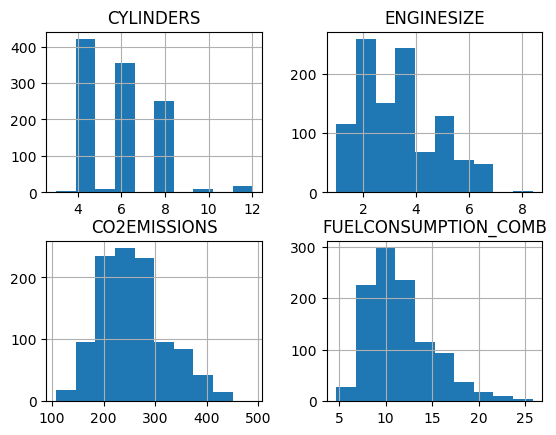

In [73]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


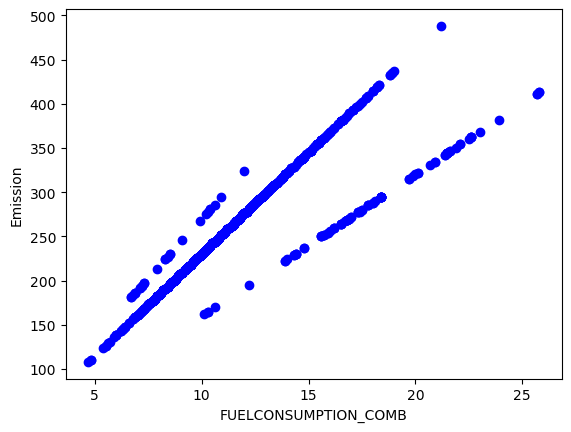

In [74]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

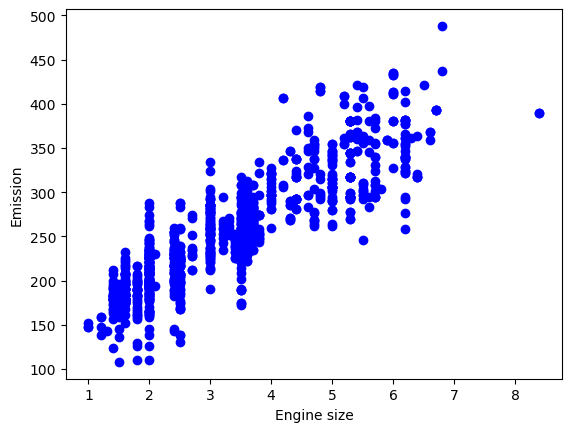

In [75]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

(0.0, 507.0)

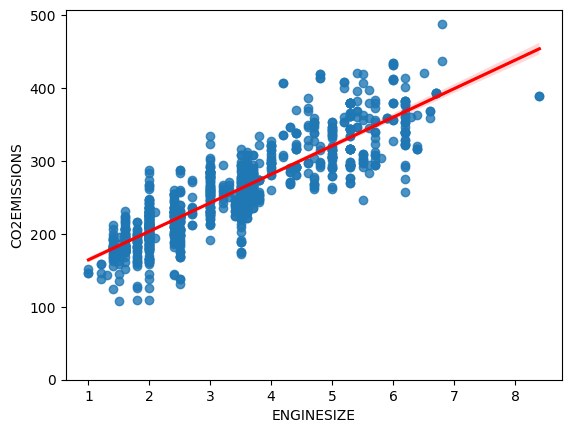

In [115]:
plt.figure()
sns.regplot(x=cdf.ENGINESIZE,y=cdf.CO2EMISSIONS,data=df,line_kws={'color':'red'})
plt.ylim(0,)

In [77]:
cdf.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


## Practice
Plot __CYLINDER__ vs the Emission, to see how linear is their relationship is:


(0.0, 507.0)

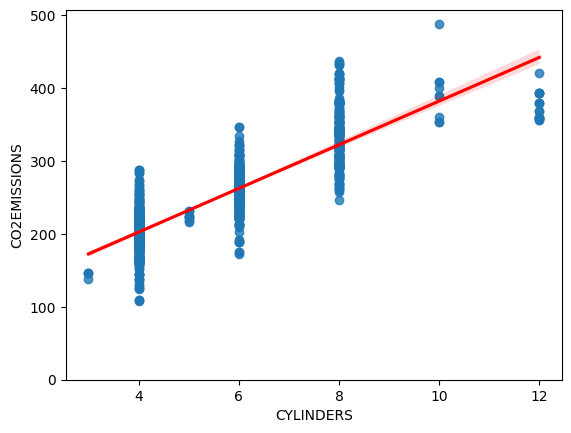

In [113]:
# write your code here

plt.figure()
sns.regplot(x=cdf.CYLINDERS,y=cdf.CO2EMISSIONS,data=df,line_kws={'color':'red'})
plt.ylim(0,)

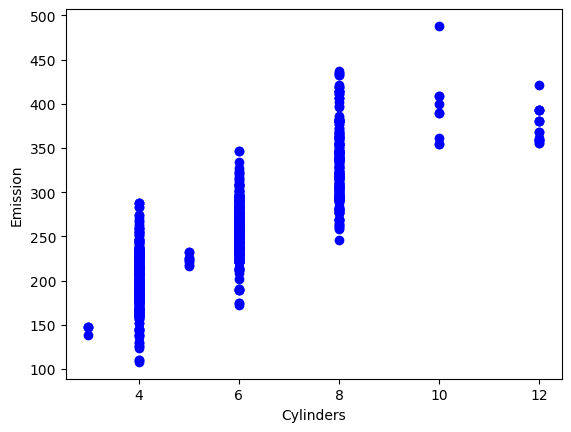

In [79]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

<details><summary>Click here for the solution</summary>

```python    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

```

</details>


#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 


In [80]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 


#### Train data distribution


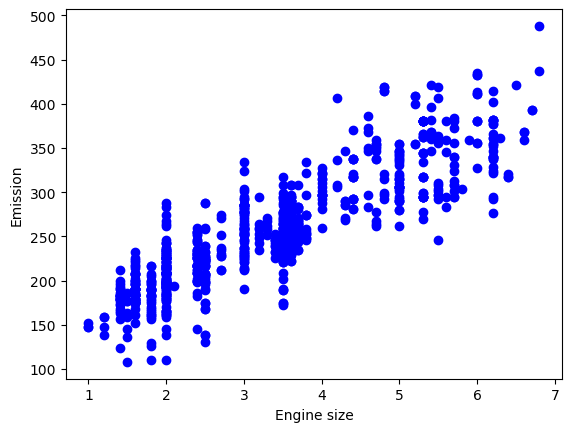

In [81]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Using sklearn package to model data.


In [82]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[40.18111491]]
Intercept:  [122.23209054]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


In [140]:
Z = df[['ENGINESIZE']]
Zf = Z.astype(float)

In [141]:
Z.head(3)

,ENGINESIZE
0,2.0
1,2.4
2,1.5


In [142]:
Zf.head(3)

,ENGINESIZE
0,2.0
1,2.4
2,1.5


In [143]:
## OWN METHOD BASED ON SCIKIT-LEARN ##
# using cross_val_score and cross_val_predict

lre = LinearRegression()

Rcross = cross_val_score(lre, Zf, df['CO2EMISSIONS'], cv=5) # better than train_test_split()
print(Rcross)
print("The mean of the 5 folds is", Rcross.mean(), "and the standard deviation is" , Rcross.std())

[0.74334613 0.7838278  0.72801992 0.73032948 0.78636053]
The mean of the 5 folds is 0.7543767707250392 and the standard deviation is 0.02563183374132815


In [145]:
# can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'.
-1 * cross_val_score(lre, Zf, df['CO2EMISSIONS'],cv=5,scoring='neg_mean_squared_error') # what exactly does that mean?

array([ 880.01976439, 1055.03715804, 1075.61966982, 1023.27423464,
        747.38339934])

In [146]:
yhat = cross_val_predict(lre, Zf, df['CO2EMISSIONS'],cv=5)
yhat[0:5]

array([201.70277046, 217.41090047, 182.06760795, 260.608258  ,
       260.608258  ])

In [147]:
df['CO2EMISSIONS'].head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

In [152]:
mse_own = mean_squared_error(df['CO2EMISSIONS'],yhat)
mse_own

956.2879541795556

In [149]:
df[['ENGINESIZE','CO2EMISSIONS']].corr()

,ENGINESIZE,CO2EMISSIONS
ENGINESIZE,1.000000,0.874154
CO2EMISSIONS,0.874154,1.000000


#### Plot outputs


We can plot the fit line over the data:


Text(0, 0.5, 'Emission')

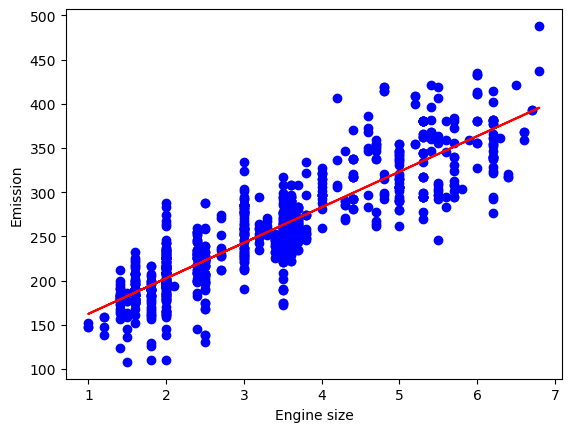

In [91]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [92]:
regr.coef_

array([[40.18111491]])

In [93]:
regr.coef_[0]

array([40.18111491])

In [94]:
regr.coef_[0][0]

40.18111490525824

In [95]:
df[['ENGINESIZE','CO2EMISSIONS']]

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
1062,3.0,271
1063,3.2,264
1064,3.0,271
1065,3.2,260


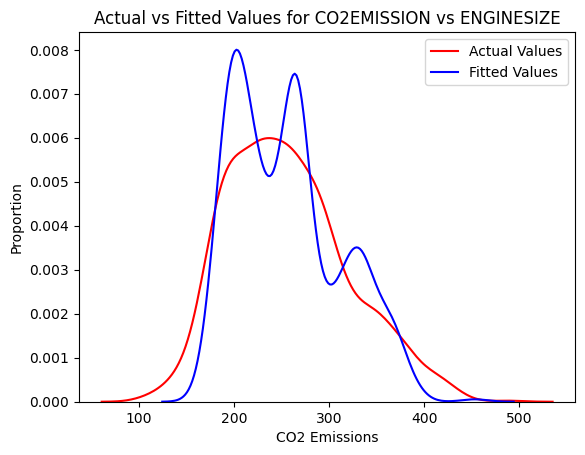

In [183]:
## OWN METHOD BASED ON SEABORN ##

# ENGINESIZE vs. CO2EMISSIONS

# df[['CO2EMISSIONS']] -->makes it 2D--> When arrays with more than one dimension are used, seaborn here ignores the color parameter and only considers the palette. 
# You can either provide a palette (to override the default blue one used in this case), or to squeeze the arrays to be one dimensional --> data=df.squeeze()
# would look like this sns.kdeplot(df[['CO2EMISSIONS']], palette=["r"], label="Actual Value")

plt.figure()

ax = sns.kdeplot(df['CO2EMISSIONS'], color="r", label="Actual Values")
sns.kdeplot(yhat, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values for CO2EMISSION vs ENGINESIZE')
plt.xlabel('CO2 Emissions')
plt.ylabel('Proportion')

plt.legend()

plt.show()
plt.close()

#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [151]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.71
Residual sum of squares (MSE): 971.37
R2-score: 0.73


In [168]:
## OWN METHOD BASED ON SCIKIT-LEARN ##
# used k-fold cross validation with 5 folds

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - df['CO2EMISSIONS'])))
print("Residual sum of squares (MSE): %.2f" % mse_own) # %.2f" % reduces the following value to two decimals
print("R2-score: %.2f" % Rcross.mean())

Mean absolute error: 23.48
Residual sum of squares (MSE): 956.29
R2-score: 0.75


## Exercise


Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe


In [ ]:
train_x = #ADD CODE

test_x = #ADD CODE


In [172]:
## OWN METHOD ##

Z1 = df[['FUELCONSUMPTION_COMB']]
Y = df['CO2EMISSIONS']

Z1f = Z1.astype(float)

<details><summary>Click here for the solution</summary>

```python    
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

```

</details>


Now train a Linear Regression Model using the `train_x` you created and the `train_y` created previously


In [ ]:
regr = linear_model.LinearRegression()

#ADD CODE


In [191]:
## OWN METHOD ##

lre1 = LinearRegression()

Rcross1 = cross_val_score(lre1,Z1f,Y,cv=5)

print(Rcross1)
print("The mean of the 5 folds is", Rcross1.mean(), "and the standard deviation is" , Rcross1.std())

[0.80635939 0.61504724 0.75348483 0.85080731 0.86748489]
The mean of the 5 folds is 0.7786367313653603 and the standard deviation is 0.09084632754963907


<details><summary>Click here for the solution</summary>

```python    
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

```

</details>


Find the predictions using the model's `predict` function and the `test_x` data


In [ ]:
predictions = #ADD CODE

In [192]:
## OWN METHOD ##

yhat1 = cross_val_predict(lre1,Z1f,Y,cv=5)
yhat1[0:5]

array([205.45487573, 222.77297798, 164.5211795 , 246.38857196,
       238.5167073 ])

<details><summary>Click here for the solution</summary>

```python    
predictions = regr.predict(test_x)

```

</details>


Finally use the `predictions` and the `test_y` data and find the Mean Absolute Error value using the `np.absolute` and `np.mean` function like done previously


In [ ]:
#ADD CODE


In [177]:
## OWN METHOD ##

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat1 - Y)))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(Y,yhat1)) # %.2f" % reduces the following value to two decimals
print("R2-score: %.2f" % Rcross1.mean())

Mean absolute error: 20.89
Residual sum of squares (MSE): 910.15
R2-score: 0.78


<details><summary>Click here for the solution</summary>

```python    
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

```

</details>


We can see that the MAE is much worse when we train using `ENGINESIZE` than `FUELCONSUMPTION_COMB`.


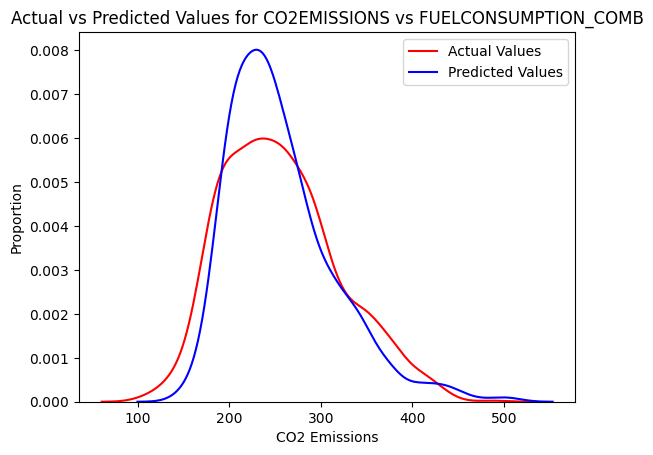

In [182]:
## OWN ##

plt.figure()

ax1 = sns.kdeplot(Y,color='r',label='Actual Values')
sns.kdeplot(yhat1,color='b',label='Predicted Values',ax=ax1)

plt.title('Actual vs Predicted Values for CO2EMISSIONS vs FUELCONSUMPTION_COMB')
plt.xlabel('CO2 Emissions')
plt.ylabel('Proportion')

plt.legend()

plt.show()
plt.close()

In [193]:
## TESTING OUT RIDGE REGRESSION ##

parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 1000000]}]

RR=Ridge() # Ridge Regression object
Grid = GridSearchCV(RR, parameters,cv=5)
Grid.fit(Z1f, Y) # fit the model
# The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR
BestRR=Grid.best_estimator_
print("Best estimator parameter for the Ridge Regression model:", BestRR)
print("R2-score: %.2f" % BestRR.score(Z1f,Y)) # now test our model on the test data

Best estimator parameter for the Ridge Regression model: Ridge(alpha=100)
R2-score: 0.80


In [194]:
## OWN RIDGE REGRESSION##

yhat_ridge = Grid.predict(Z1f)
yhat_ridge[0:5]

array([206.6397703 , 224.34503042, 164.79097365, 248.48856695,
       240.44072144])

In [195]:
## OWN RIDGE REGRESSION##

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat_ridge - Y)))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(Y,yhat_ridge)) # %.2f" % reduces the following value to two decimals
print("R2-score: %.2f" % BestRR.score(Z1f,Y))

Mean absolute error: 20.50
Residual sum of squares (MSE): 819.12
R2-score: 0.80


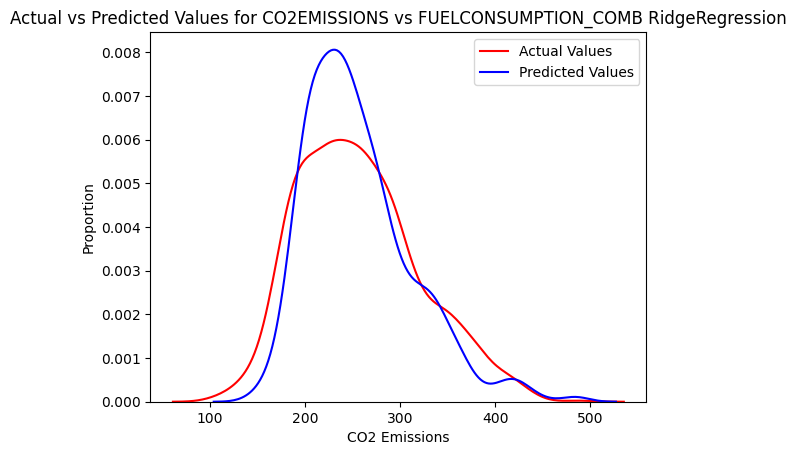

In [196]:
## OWN RIDGE REGRESSION##

plt.figure()

ax2 = sns.kdeplot(Y,color='r',label='Actual Values')
sns.kdeplot(yhat_ridge,color='b',label='Predicted Values',ax=ax2)

plt.title('Actual vs Predicted Values for CO2EMISSIONS vs FUELCONSUMPTION_COMB RidgeRegression')
plt.xlabel('CO2 Emissions')
plt.ylabel('Proportion')

plt.legend()

plt.show()
plt.close()

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Watson Studio</a>



### Thank you for completing this lab!


## Author

Saeed Aghabozorgi


### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Joseph Santarcangelo</a>

Azim Hirjani


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-11-03 | 2.1  | Lakshmi Holla  |  Changed URL of the csv |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
